# Capstone Project 1 - Applicance Energy Prediction

In [1]:
# Import the libraries -

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from datetime import datetime as dt
# Seed value for reproducing the code
seed = 79
np.random.seed(seed)

# Load the Dataset for Energy data

In [2]:
dfmerge = pd.read_csv('input.csv')

In [3]:
dfmerge.head(2)

,Unnamed: 0,date_x,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,value
0,0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,31.41
1,1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,31.41


In [4]:
dfmerge.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
dfmerge.head(2)

,date_x,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,value
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,31.41
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,31.41


The value column is populated with previous day values for the records which were null and renamed the column to "oilprice".

In [6]:
# Temperature sensors columns
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Humidity sensors columns
hum_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Weather data columns
wth_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Target column
tgt = ["Appliances"]

# Exploratory Data Analysis - 

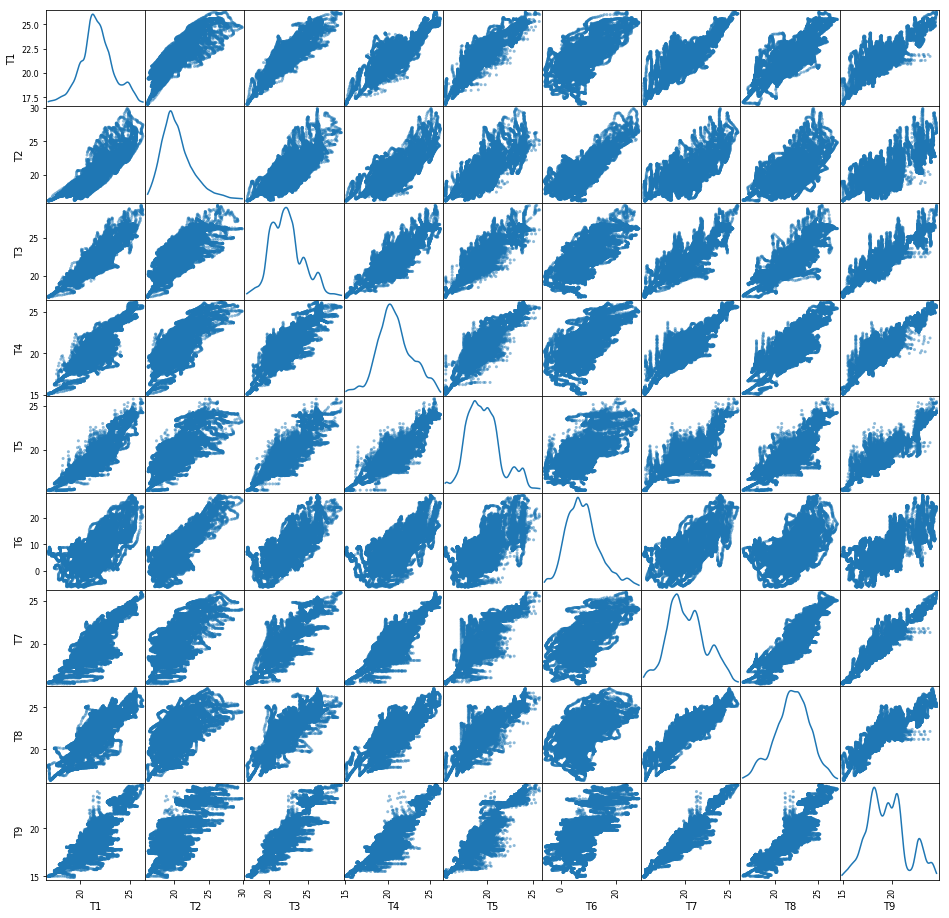

In [7]:
temp_scatter = pd.plotting.scatter_matrix(dfmerge[temp_cols], diagonal="kde", figsize=(16, 16))

From the above, we can see that there is some linear relation between T7 and T9. Others are having the shape but are not exactly linear.

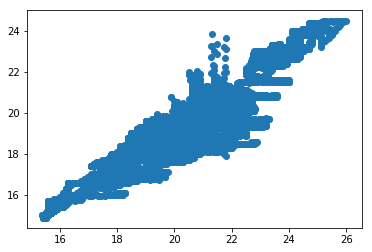

In [8]:
plt.scatter(dfmerge["T7"], dfmerge["T9"])

There is a definetly a relation between these two attributes but also have some outliers

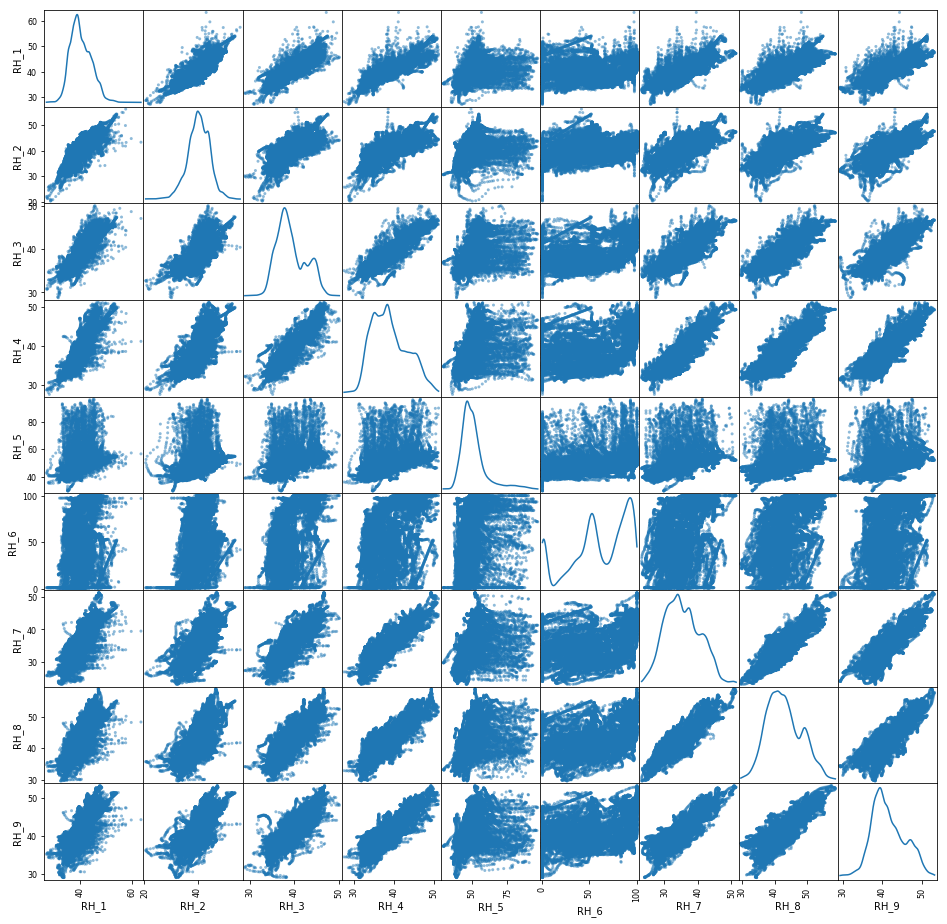

In [9]:
rho_scatter = pd.plotting.scatter_matrix(dfmerge[hum_cols], diagonal="kde", figsize=(16, 16))

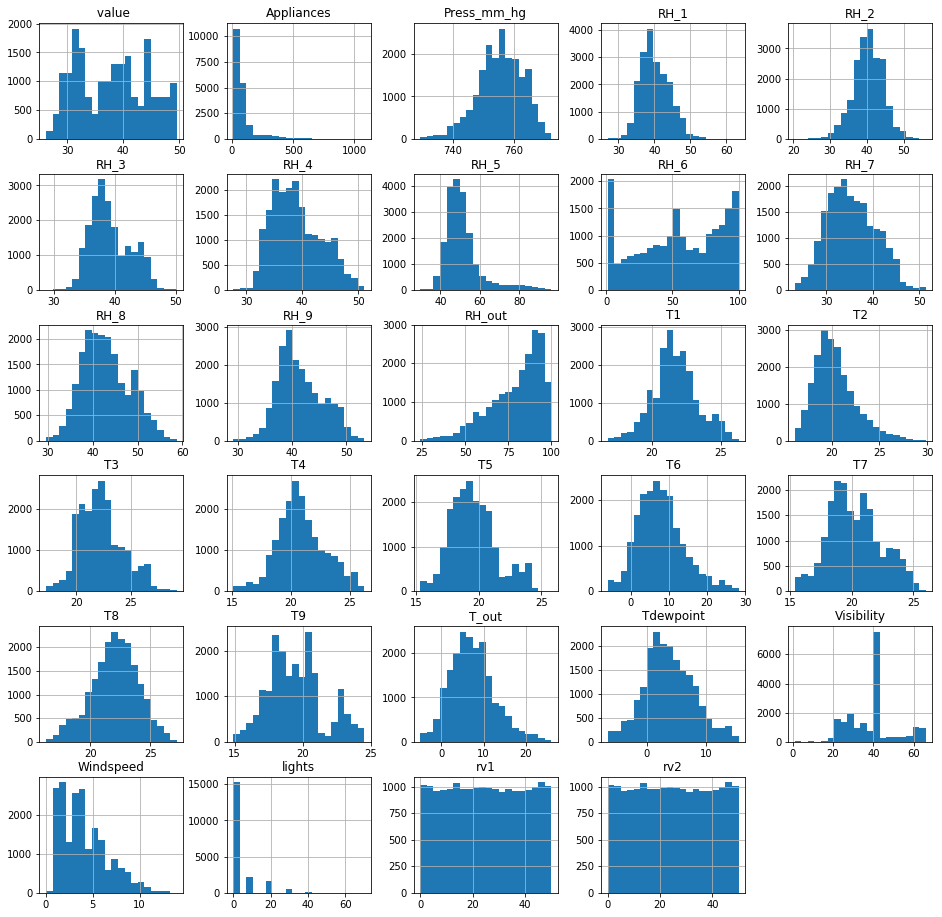

In [10]:
histograms = dfmerge.hist(figsize=(16, 16), bins=20)

All humidity values are almost having normal distribution except RH_6 and RH_out. 
In other words the reading from inside the home is having normal distribution.

All temperature readings follow a Normal distribution except for T9.

Visibility, Windspeed and Appliances are having skewed data.

Target variable, Appliances is highly right skewed.

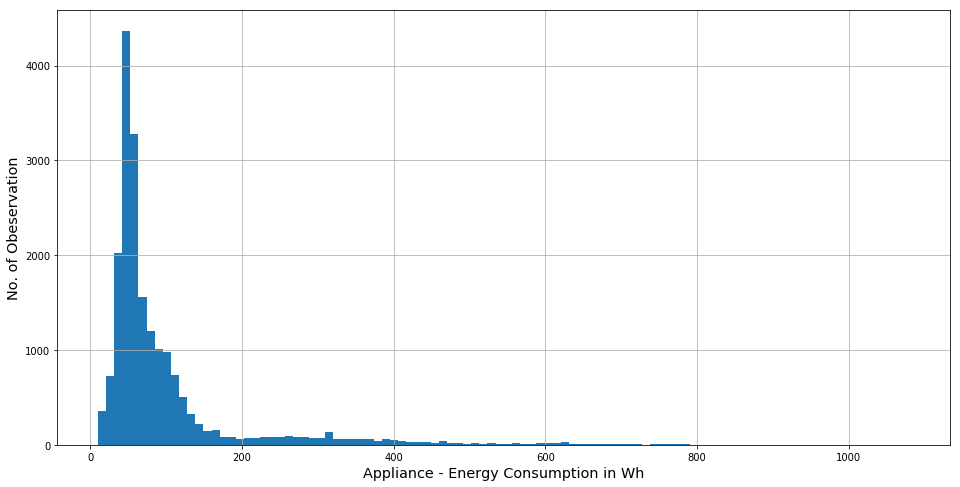

In [11]:
# Target - Appliances (plot histrogram)

plt.xlabel("Appliance - Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of Obeservation", fontsize="x-large")

dfmerge["Appliances"].hist(figsize=(16, 8), bins=100)

In [12]:
dfmerge.columns

Index(['date_x', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', ' value'],
      dtype='object')

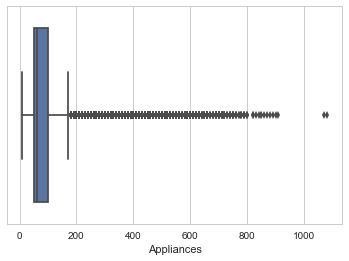

In [14]:
sns.set(style="whitegrid")
sns.boxplot(dfmerge['Appliances'])

## Two records are shown as Outliers from the  above boxplot

In [15]:
print("Percentage of dataset in range of 0-200 Wh is","{:.3f}%".format(
    (dfmerge[dfmerge.Appliances <= 200]["Appliances"].count()*100.0) / dfmerge.shape[0]))

Percentage of dataset in range of 0-200 Wh is 90.291%


# Correlation Plot

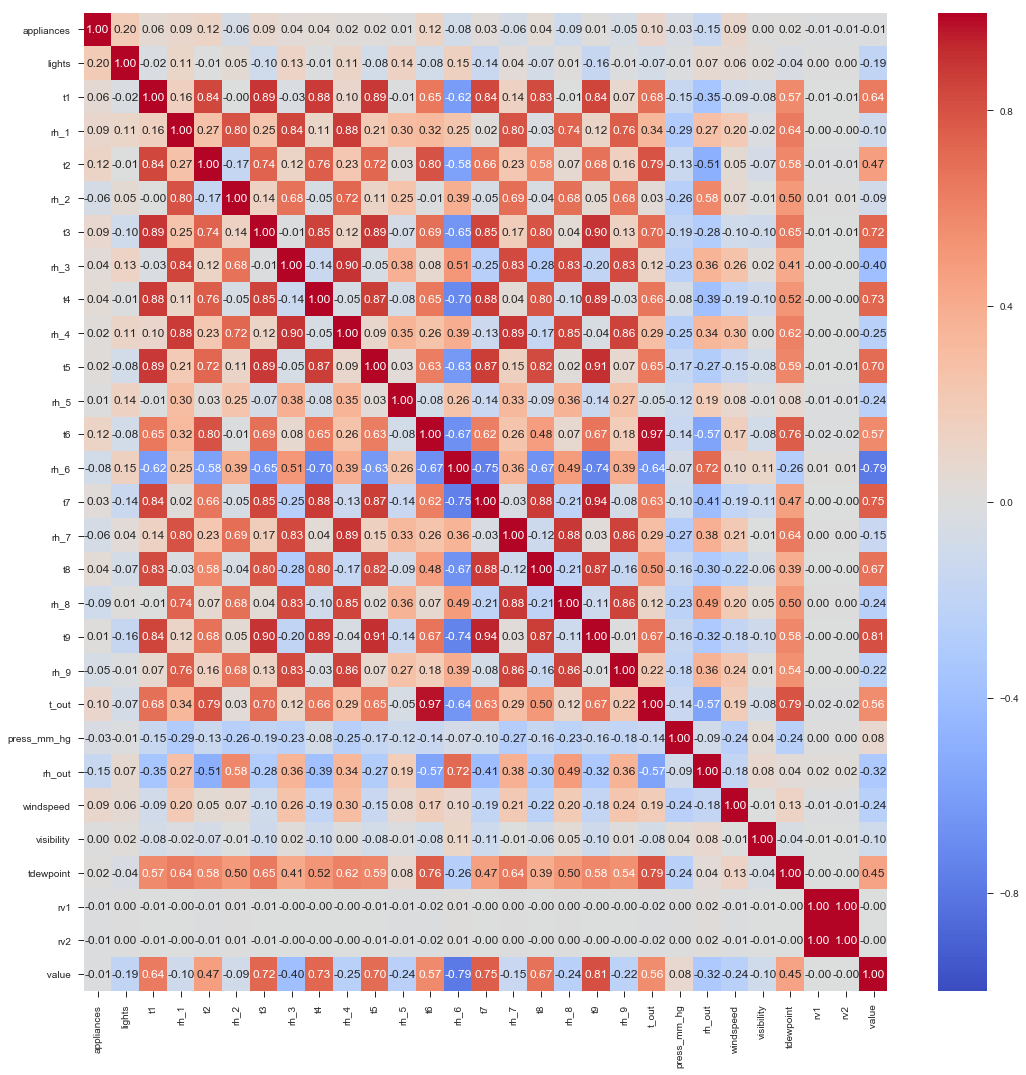

In [43]:
dfmerge_corr = dfmerge.corr()
#dfmerge_corr[np.abs(dfmerge_corr)<.2] = 0
plt.figure(figsize=(18,18))
sns.heatmap(dfmerge_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',fmt = '.2f',
            annot=True);

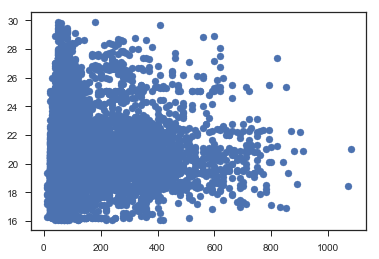

In [46]:
plt.scatter(dfmerge["appliances"], dfmerge["t2"])

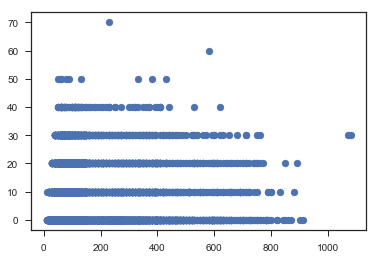

In [47]:
plt.scatter(dfmerge["appliances"], dfmerge["lights"])

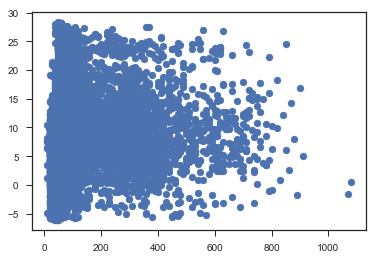

In [48]:
plt.scatter(dfmerge["appliances"], dfmerge["t6"])

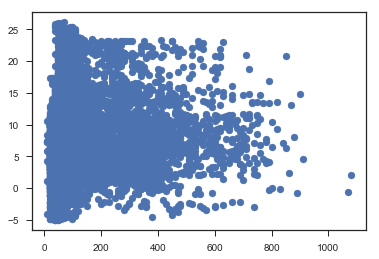

In [51]:
plt.scatter(dfmerge["appliances"], dfmerge["t_out"])

# Lets find the high correlation data from dataset

In [17]:
dfmerged = dfmerge.drop('date_x', axis = 1)

In [18]:
# To generate all pairs for given columns
from itertools import combinations
from scipy.stats import pearsonr

for pair in combinations(dfmerged.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(dfmerged[col_1], dfmerged[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.901323585082566
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9110551178067933
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9747866900664536
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9447764235687445
p-value : 0.0
Column pair : rv1, rv2
Correlation coefficient : 1.0
p-value : 0.0


T9 has high correlation with 3 other columns and p-value is close to 0, we can say like T9 is a redundant.

T6 and T_out is highly correlated, T6 is from the outside the house reading 
and T_out is the data collected from weather's site

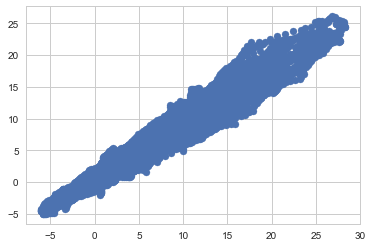

In [19]:
plt.scatter(dfmerge["T6"], dfmerge["T_out"])

Its seems like T6 and T_out is linearly correlated.

In [20]:
# Lowercase the column names
dfmerge.columns = [x.lower() for x in dfmerge.columns]

In [21]:
dfmerge.head(2)

,date_x,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,value
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,31.41
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,31.41


In [22]:
# Append more columns to the DataFrame based on datetime
df = dfmerge.copy()
df['dateupdate'] = pd.to_datetime(dfmerge['date_x']).dt.normalize()

In [23]:
# Set datetime index due to time series analysis 
df = df.set_index('dateupdate')

In [24]:
df.head(2)

,date_x,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,value
dateupdate,,,,,,,,,,,,,,,,,,,,,
2016-01-11,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,31.41
2016-01-11,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,31.41


In [25]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['week'] = df.index.week

In [26]:
#log appliances
df['log_appliances'] = np.log(df.appliances)

# Average house temperature and humidity
df['house_temp'] =(df.t1+df.t2+df.t3+df.t4+df.t5+df.t7+df.t8+df.t9)/8
df['house_hum'] =(df.rh_1+df.rh_2+df.rh_3+df.rh_4+df.rh_5+df.rh_7+df.rh_8+df.rh_9)/8

In [27]:
df.head(10)

,date_x,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,rv1,rv2,value,month,weekday,hour,week,log_appliances,house_temp,house_hum
dateupdate,,,,,,,,,,,,,,,,,,,,,
2016-01-11,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,31.41,1,0,0,2,4.094345,18.435000,46.742500
2016-01-11,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,31.41,1,0,0,2,4.094345,18.439167,46.672708
2016-01-11,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,31.41,1,0,0,2,3.912023,18.421667,46.562917
2016-01-11,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,31.41,1,0,0,2,3.912023,18.396250,46.468750
2016-01-11,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,31.41,1,0,0,2,4.094345,18.408750,46.462917
2016-01-11,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,44.919484,44.919484,31.41,1,0,0,2,3.912023,18.392083,46.420000
2016-01-11,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,47.233763,47.233763,31.41,1,0,0,2,4.094345,18.387917,46.375417
2016-01-11,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,33.039890,33.039890,31.41,1,0,0,2,4.094345,18.372083,46.350417
2016-01-11,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,31.455702,31.455702,31.41,1,0,0,2,4.094345,18.380417,46.361354


In [28]:
df.iloc[1000]

date_x            2016-01-18 15:40:00
appliances                         30
lights                              0
t1                            19.3233
rh_1                             41.4
t2                               18.2
rh_2                             41.4
t3                               19.6
rh_3                            40.59
t4                              18.79
rh_4                            38.29
t5                             17.575
rh_5                          55.5675
t6                           0.783333
rh_6                          95.7561
t7                                 19
rh_7                          34.6633
t8                               19.6
rh_8                          41.8633
t9                               17.2
rh_9                            37.79
t_out                       -0.466667
press_mm_hg                   756.867
rh_out                             69
windspeed                     2.33333
visibility                    36.3333
tdewpoint   

In [29]:
df['hour'].unique()

array([0])

In [30]:
# Calculate average energy load per weekday and hour
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

# Average energy consumption per weekday and hour
df['weekday_avg'] = list(map(code_mean(df[:], 'weekday', "appliances").get, df.weekday))
df['hour_avg'] = list(map(code_mean(df[:], 'hour', "appliances").get, df.hour))

In [31]:
df.head(2)

,date_x,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,value,month,weekday,hour,week,log_appliances,house_temp,house_hum,weekday_avg,hour_avg
dateupdate,,,,,,,,,,,,,,,,,,,,,
2016-01-11,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,31.41,1,0,0,2,4.094345,18.435000,46.742500,111.450684,97.694958
2016-01-11,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,31.41,1,0,0,2,4.094345,18.439167,46.672708,111.450684,97.694958


In [32]:
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()

def monthly(x,df=df):
    return df.groupby('month')[x].mean()
'''
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()
def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)
    '''

"\ndef hourly(x,df=df):\n    return df.groupby('hour')[x].mean()\ndef monthly_daily(x,df=df):\n    by_day = df.pivot_table(index='weekday', \n                                columns=['month'],\n                                values=x,\n                                aggfunc='mean')\n    return round(by_day, ndigits=2)\n    "

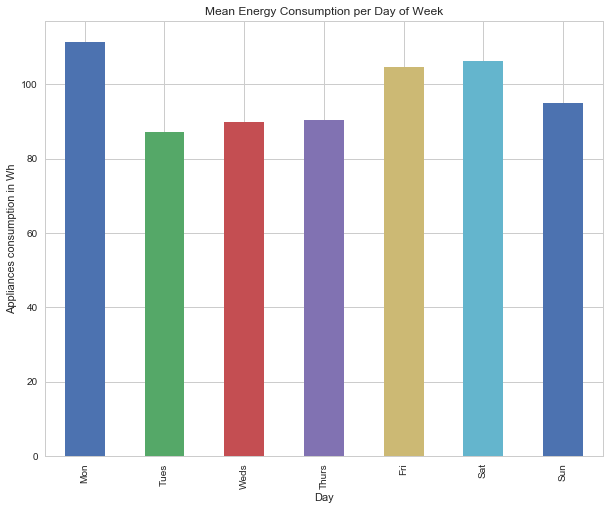

In [33]:
# Plot of Mean Energy Consumption per Day of Week

daily('appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

Monday, the energy consumption has been maximum, followed by Saturday, Firday and Sunday.

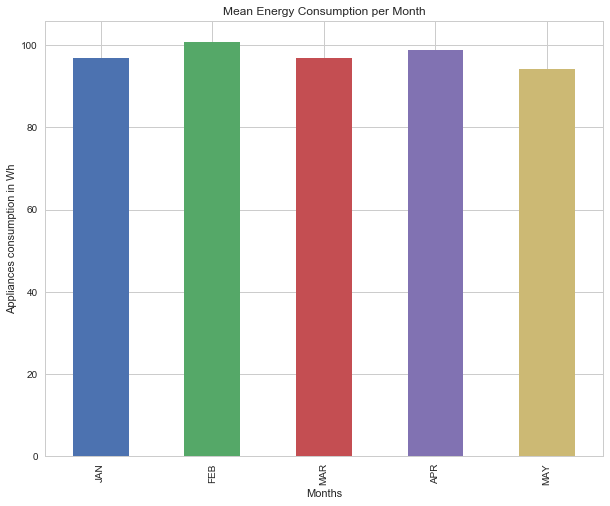

In [34]:
(df.groupby('month')['appliances'].mean()).plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 5, 1)) 
labels = "JAN FEB MAR APR MAY JUN".split()
plt.xlabel('Months')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Month')
plt.xticks(ticks, labels);

Feb month is showing has the highest engergy consumption, rest all the other month consumption seems to be almost close to each other.

Text(0.5,1,'Energy Consumption per Month over the Time')

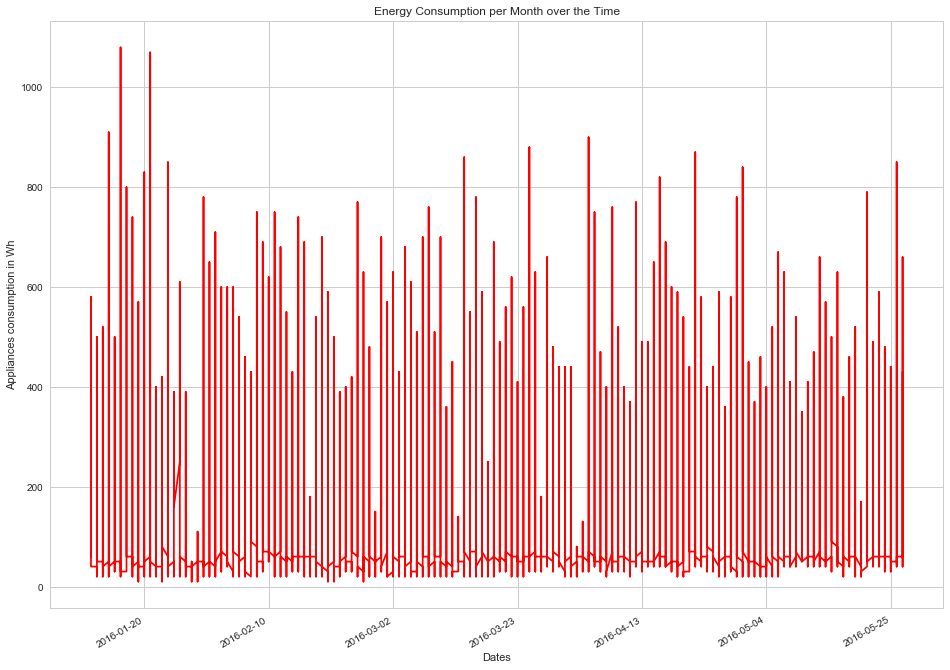

In [35]:
df['appliances'].plot(kind = 'line', figsize=(16,12), color = 'red')
plt.xlabel('Dates')
plt.ylabel('Appliances consumption in Wh')
plt.title('Energy Consumption per Month over the Time')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Appliances log(wH)')

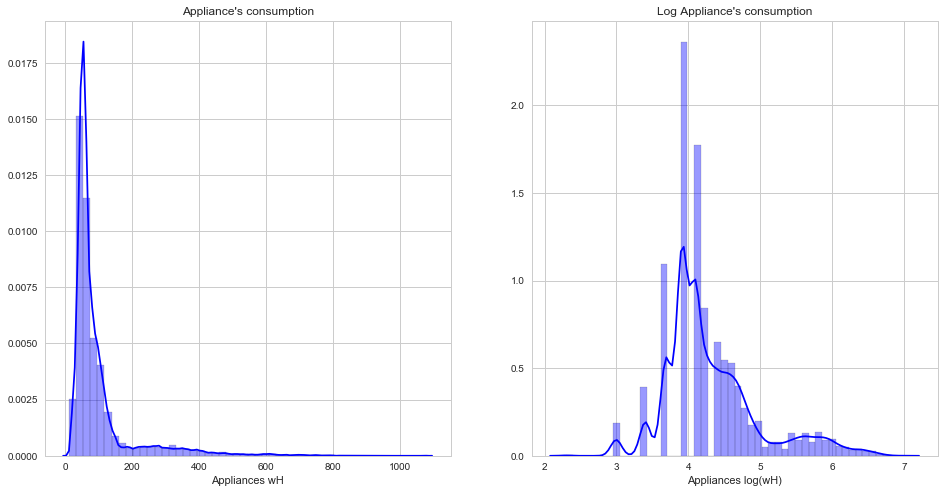

In [36]:
#Histogram of Appliance's consumption

f, axes = plt.subplots(1, 2,figsize=(16,8))

sns.distplot(df.appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot(df.log_appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

In [37]:
df.columns

Index(['date_x', 'appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3',
       'rh_3', 't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8',
       'rh_8', 't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed',
       'visibility', 'tdewpoint', 'rv1', 'rv2', ' value', 'month', 'weekday',
       'hour', 'week', 'log_appliances', 'house_temp', 'house_hum',
       'weekday_avg', 'hour_avg'],
      dtype='object')

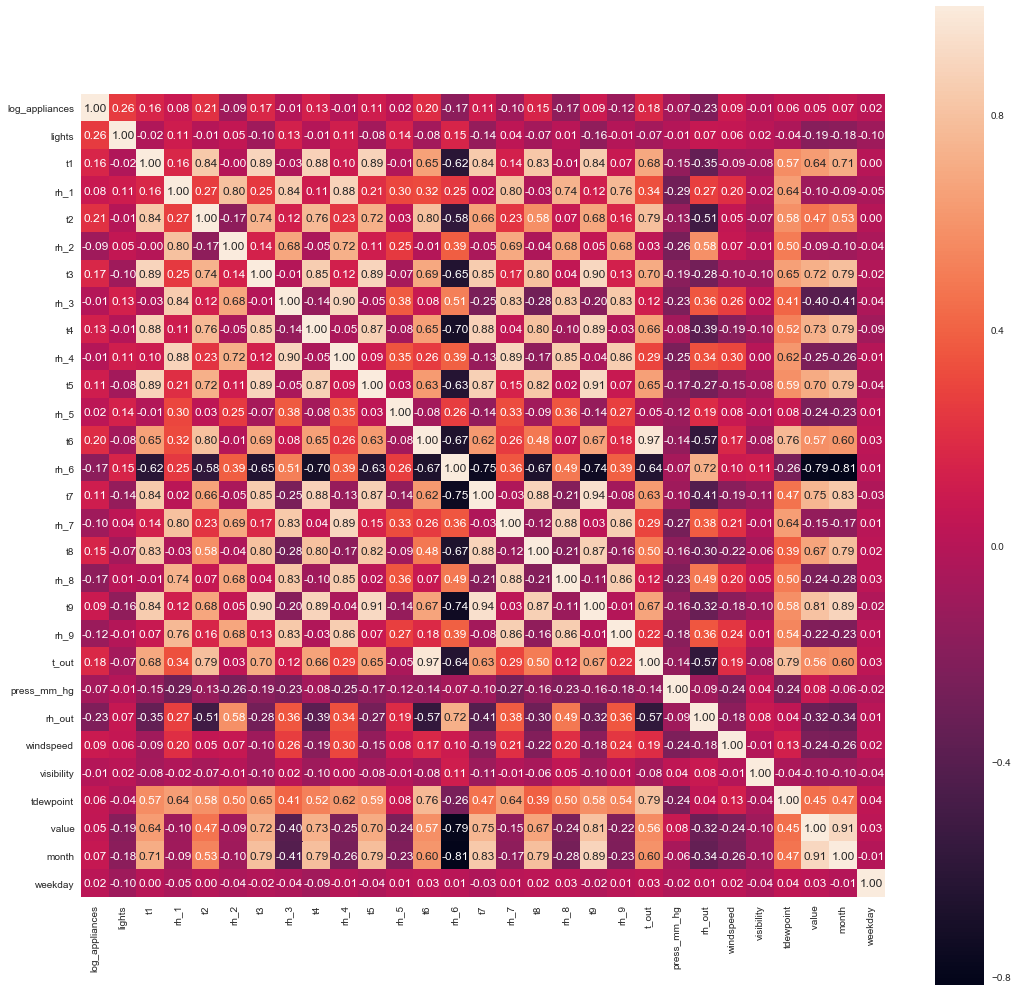

In [55]:

# Pearson Correlation among the variables
col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint',' value', 'month', 'weekday']

corr = df[col].corr()

#corr[np.abs(corr)<0.05] = 0

plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

The most correlated features with energy consumtion(log_appliances) are: lights=0.26, t6=0.20, t2=0.22, t3 = 0.17,t_out = 0.18, rh_out = -0.23, rh_8 = -0.17, rh_6 = -0.17, windspeed = 0.09.

In a linear regression problem only linear independent variables can be be used as features to explain energy consumption otherwise we will have multicolinearity issues.

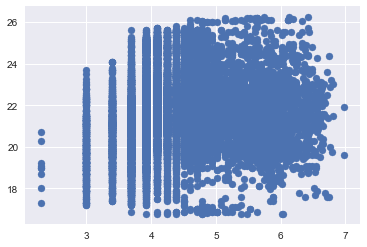

In [58]:
plt.scatter(df["log_appliances"], df["t1"])

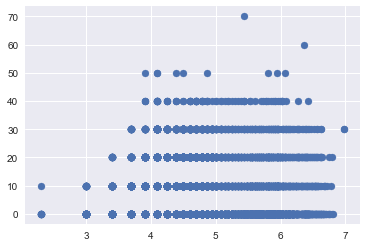

In [59]:
plt.scatter(df["log_appliances"], df["lights"])

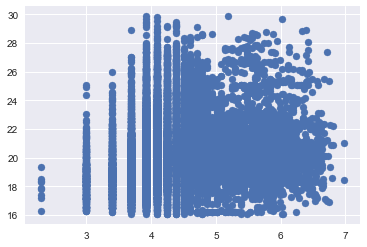

In [62]:
plt.scatter(df["log_appliances"], df["t2"])

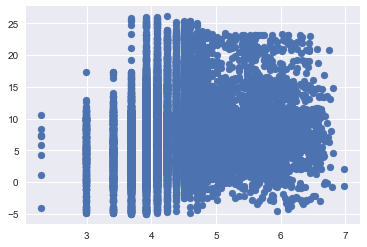

In [63]:
plt.scatter(df["log_appliances"], df["t_out"])

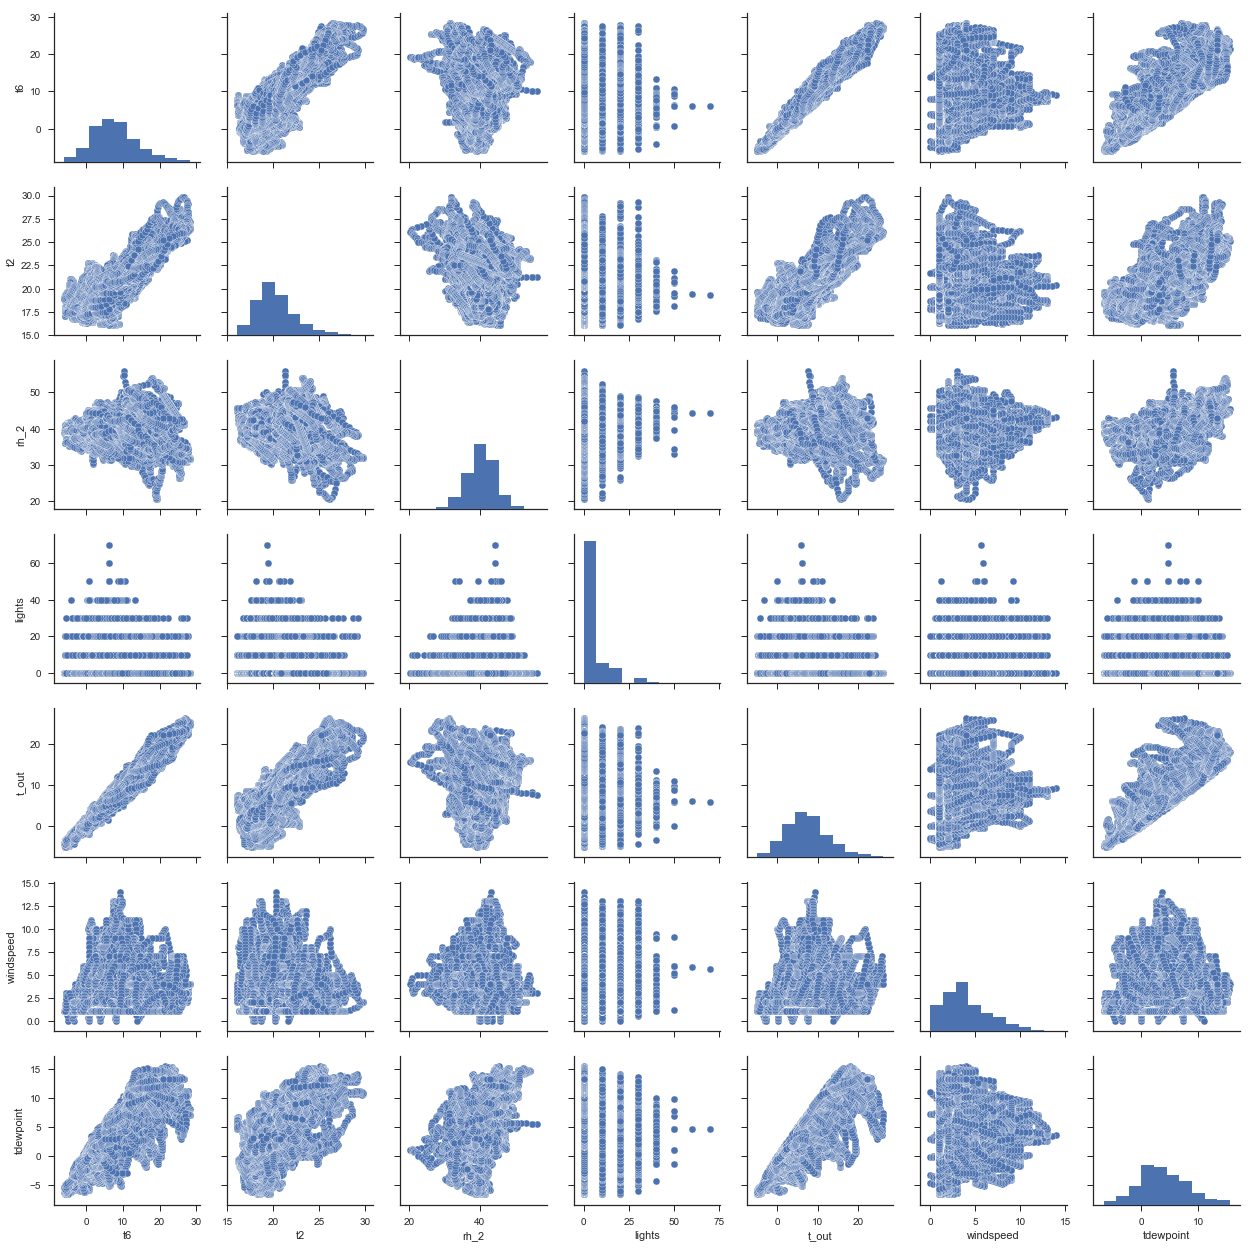

In [39]:
#lights=0.26, t6=0.20, t2=0.22, t3 = 0.17,t_out = 0.18, rh_out = -0.23, rh_8 = -0.17, 
#rh_6 = -0.17, windspeed = 0.09.

col = ['t6','t2', 'rh_2','lights','t_out','windspeed','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show();

In [40]:
df = df.drop('date_x', axis = 1)

In [41]:
# To generate all pairs for given columns
from itertools import combinations
from scipy.stats import pearsonr

for pair in combinations(df.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(df[col_1], df[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Column pair : appliances, log_appliances
Correlation coefficient : 0.9003970429558662
p-value : 0.0
Column pair : t1, house_temp
Correlation coefficient : 0.94771111007856
p-value : 0.0
Column pair : t3, t9
Correlation coefficient : 0.901323585082566
p-value : 0.0
Column pair : t3, house_temp
Correlation coefficient : 0.9373284936833828
p-value : 0.0
Column pair : rh_3, house_hum
Correlation coefficient : 0.9024983262911169
p-value : 0.0
Column pair : t4, house_temp
Correlation coefficient : 0.9408734764208576
p-value : 0.0
Column pair : rh_4, house_hum
Correlation coefficient : 0.9253906690357948
p-value : 0.0
Column pair : t5, t9
Correlation coefficient : 0.9110551178067933
p-value : 0.0
Column pair : t5, house_temp
Correlation coefficient : 0.9444914096228828
p-value : 0.0
Column pair : t6, t_out
Correlation coefficient : 0.9747866900664536
p-value : 0.0
Column pair : t7, t9
Correlation coefficient : 0.9447764235687445
p-value : 0.0
Column pair : t7, house_temp
Correlation coefficie